In [9]:
# run: ipython kernel install --name "poetry-venv" --user

In [10]:
import random
from cqftsn5g.modules.Models import Flow, Path, Node, Link
from cqftsn5g.cp import cp_sat_scheduling
from cqftsn5g.modules.NRAmc import SlotFormat

def generate_flows(period_range, payload_range, priority_range, jitter_range, bandwidth_range, flow_type, path_range, numbers):
    # random select period, payload, priority, jitter, bandwidth to generate numbers flows
    flows = []
    
    for i in range(numbers):
        period = random.choice(period_range)
        payload = random.choice(payload_range)
        priority = random.choice(priority_range)
        jitter = random.choice([x for x in jitter_range if x <= period]) if flow_type == "TT" else 0
        bandwidth = random.choice(bandwidth_range)
        latency = period if flow_type == "TT" else period * 5
        path = random.choice(path_range)
        id = f"{flow_type}_{i}_p{priority}"

        flows.append(Flow(id, period, payload, priority, latency, jitter, bandwidth, flow_type, path))

    return flows
    

In [11]:

# Nodes
host1 = Node("TSN host 1", True)
host2 = Node("TSN host 2", True)
tsn_sw1 = Node("TSN switch 1", False)
dstt = Node("DS-TT", False)
ue1 = Node("UE 1", False)
gnb = Node("gNodeB", False)
upf_nwtt = Node("UPF NW-TT", False)
tsn_sw2 = Node("TSN switch 2", False)
host3 = Node("TSN host 3", True)

# Links
host1_tsn_sw1 = Link(host1, tsn_sw1, 1000, "wire")
host2_tsn_sw1 = Link(host2, tsn_sw1, 1000, "wire")
tsn_sw1_dstt = Link(tsn_sw1, dstt, 1000, "wire")
dstt_ue1 = Link(dstt, ue1, 1000, "wire")
ue1_gnb = Link(ue1, gnb, 1000, "wireless")
gnb_upf_nwtt = Link(gnb, upf_nwtt, 1000, "wire")
upf_nwtt_tsn_sw2 = Link(upf_nwtt, tsn_sw2, 1000, "wire")
tsn_sw2_host3 = Link(tsn_sw2, host3, 1000, "wire")

links_TSN = [host1_tsn_sw1, host2_tsn_sw1, tsn_sw1_dstt, dstt_ue1, gnb_upf_nwtt, upf_nwtt_tsn_sw2, tsn_sw2_host3]
links_5G = [ue1_gnb]


In [12]:
Paths = {
    "path1": Path(
        src=host1,
        dst=host3,
        links=[
            host1_tsn_sw1,
            tsn_sw1_dstt,
            dstt_ue1,
            ue1_gnb,
            gnb_upf_nwtt,
            upf_nwtt_tsn_sw2,
            tsn_sw2_host3,
        ],
        cqi=14,
        direction="UL",
    ),
    "path2": Path(
        src=host2,
        dst=host3,
        links=[
            host2_tsn_sw1,
            tsn_sw1_dstt,
            dstt_ue1,
            ue1_gnb,
            gnb_upf_nwtt,
            upf_nwtt_tsn_sw2,
            tsn_sw2_host3,
        ],
        cqi=13,
        direction="UL",
    ),
    "path3": Path(
        src=host1,
        dst=host3,
        links=[
            tsn_sw2_host3,
            upf_nwtt_tsn_sw2,
            gnb_upf_nwtt,
            ue1_gnb,
            dstt_ue1,
            tsn_sw1_dstt,
            host1_tsn_sw1,
        ],
        cqi=12,
        direction="DL",
    ),
}

In [13]:
import math

def calculate_gcd(flows: list[Flow]):
    periods = [flow.period for flow in flows]
    return math.gcd(*periods)


def calculate_lcm(flows: list[Flow]):
    periods = [flow.period for flow in flows]
    return math.lcm(*periods)

def find_largest_factor(gcd, interval_bound):
    for i in range(interval_bound - 1, 0, -1):
        if gcd % i == 0:
            return i
    return 1

In [14]:
# from dataclasses import asdict
# from pprint import pprint
# import json

# pprint(tt_flows)
# flows = [asdict(flow) for flow in tt_flows + avb_flows]
# output = json.dump(flows, open("flows.json", "w"))

### Test Case 1

GCD: 2500
LCM: 10000
Jitter minimum: 0
Deadline minimum: 2500
hops maximum: 7
Interval maximum = deadline minimum / hops maximum: 357.14285714285717
Interval maximum: 357
N = 40
TTI = 62.5
TSN capacity: 25000
5G # of RB: 160
UL payload sum: 7400, DL payload sum: 11100
UL RB sum: 1777, DL RB sum: 2991
Solution found:
TT_0_p2 is scheduled
ID: TT_0_p2, period = 2500, payload = 200, priority = 2, deadline = 2500, jitter = 2500, bandwidth = 0, path = path3
1-th at interval 2
2-th at interval 13
3-th at interval 22
4-th at interval 33
TT_1_p2 is scheduled
ID: TT_1_p2, period = 2500, payload = 200, priority = 2, deadline = 2500, jitter = 2500, bandwidth = 0, path = path3
1-th at interval 2
2-th at interval 12
3-th at interval 21
4-th at interval 33
TT_2_p3 is scheduled
ID: TT_2_p3, period = 2500, payload = 200, priority = 3, deadline = 2500, jitter = 2500, bandwidth = 0, path = path3
1-th at interval 1
2-th at interval 11
3-th at interval 23
4-th at interval 32
TT_3_p4 is scheduled
ID: TT_3_p

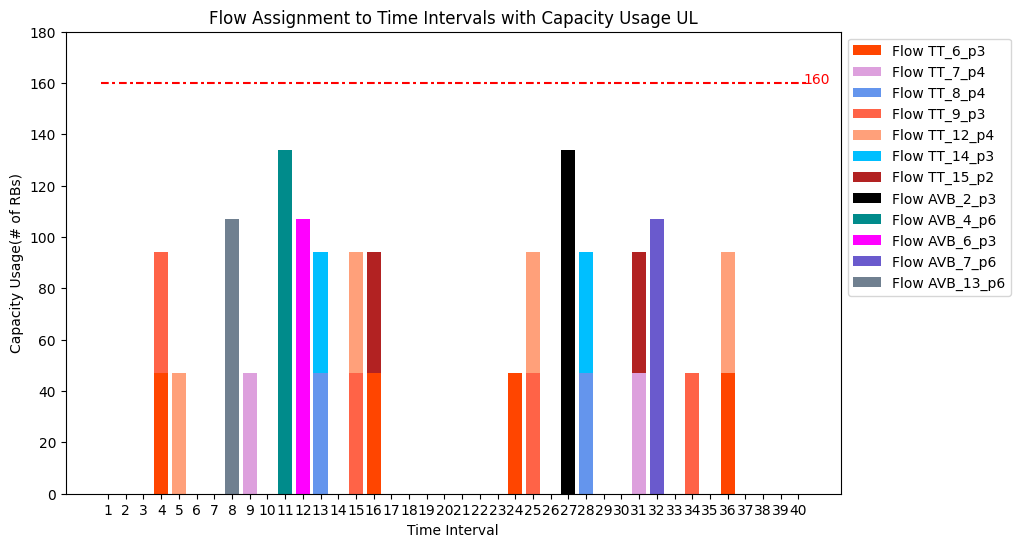

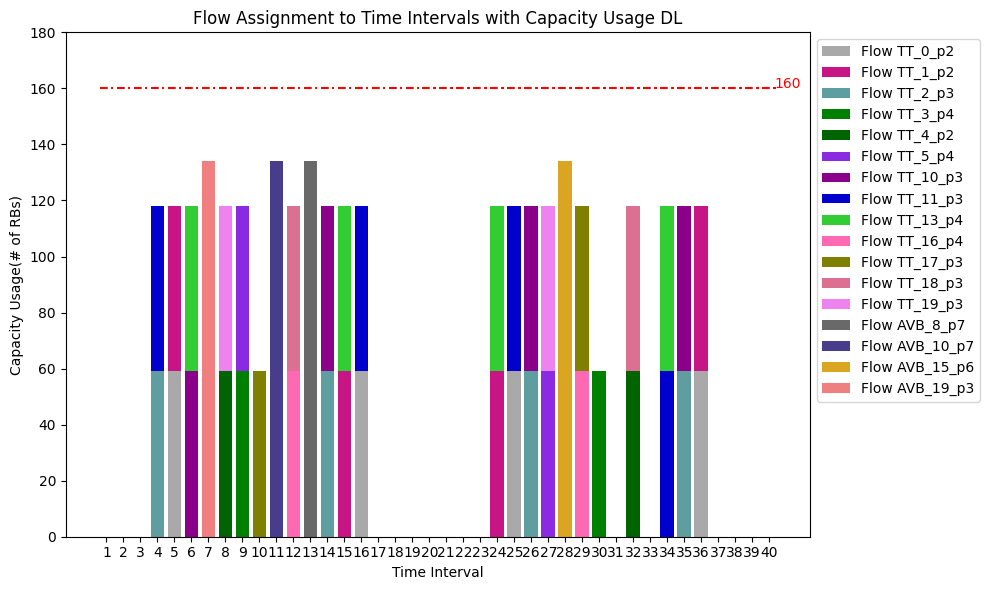

[Flow_assignment(flow=Flow(id='TT_0_p2',
                           period=2500,
                           payload=200,
                           priority=2,
                           latency=2500,
                           jitter=2500,
                           bandwidth=0,
                           flowType='TT',
                           path='path3'),
                 rb_usage=59,
                 serve_time=[2, 13, 22, 33],
                 fiveG_link_serve_time=[5, 16, 25, 36],
                 direction='DL'),
 Flow_assignment(flow=Flow(id='TT_1_p2',
                           period=2500,
                           payload=200,
                           priority=2,
                           latency=2500,
                           jitter=2500,
                           bandwidth=0,
                           flowType='TT',
                           path='path3'),
                 rb_usage=59,
                 serve_time=[2, 12, 21, 33],
                 fiveG_link_se

In [15]:
period_range = [2500, 5000]
payload_range = [200]
priority_range = [2, 3, 4]
jitter_range = [2500, 5000]
path_range = ["path1", "path3"]

tt_flows = generate_flows(
    period_range, payload_range, priority_range, jitter_range, [0], "TT", path_range, 20
)
# tt_flows = []

period_range = [5000, 10000]
payload_range = [500, 1000] # bytes
priority_range = [3, 6, 7]
jitter_range = [5000, 10000]
bandwidth_range = [0.1, 0.2, 0.5]  # Mbps: 1Mbps = 1000000 bits per second = 125 000 bytes per second
path_range = ["path1", "path2", "path3", "path3"]

avb_flows = generate_flows(
    period_range, payload_range, priority_range, jitter_range, bandwidth_range, "AVB", path_range, 20
)
# avb_flows = []


flows = tt_flows + avb_flows

gcd = calculate_gcd(flows)
lcm = calculate_lcm(flows)
print(f"GCD: {gcd}")
print(f"LCM: {lcm}")
jitter_min = min([flow.jitter for flow in flows])
print(f"Jitter minimum: {jitter_min}")
latency_min = min([flow.latency for flow in flows])
print(f"Deadline minimum: {latency_min}")
hops_max = max([path.hops for key, path in Paths.items()])
print(f"hops maximum: {hops_max}")
interval_max = latency_min / hops_max
print(f"Interval maximum = deadline minimum / hops maximum: {latency_min / hops_max}")

interval_maximum = math.floor(min(jitter_min / 2, interval_max) if jitter_min != 0 else interval_max)
print(f"Interval maximum: {interval_maximum}")

print("============================================")


# read from stdinput
hyper_cycle = int(input(f"Enter the hyper cycle: (multiple of {lcm})"))
time_interval = int(
    input(f"Enter the time interval: (lower than {interval_maximum} and factor of {gcd})")
)
mu = 4
U_TSN = 0.8
B_TSN = 1000
U_5G = 0.8
num_bands = 50
slotFormat = SlotFormat(
    tdd=True,
    numDlSymbols=6,
    numUlSymbols=6,
    numFlexSymbols=2,
)

flow_assignments = cp_sat_scheduling(
    tt_flows,
    avb_flows,
    links_TSN,
    links_5G,
    Paths,
    hyper_cycle,
    time_interval,
    mu,
    U_TSN,
    B_TSN,
    U_5G,
    num_bands,
    slotFormat,
    only_fiveG=True
)
from pprint import pprint
pprint(flow_assignments)

In [16]:
# period_range = [4000, 5000, 10000, 20000]
# payload_range = [50, 100, 250, 500]
# priority_range = [2, 3, 4]
# jitter_range = [2000, 2500, 5000]
# path_range = ["path1", "path2", "path3"]

# tt_flows = generate_flows(
#     period_range, payload_range, priority_range, jitter_range, [0], "TT", path_range, 10
# )

# period_range = [5000, 10000]
# payload_range = [500, 1000] # bytes
# priority_range = [5, 6, 7]
# jitter_range = [5000, 10000]
# bandwidth_range = [0.5, 1]  # Mbps: 1Mbps = 1000000 bits per second = 125 000 bytes per second
# path_range = ["path1", "path2", "path3"]

# avb_flows = generate_flows(
#     period_range, payload_range, priority_range, jitter_range, bandwidth_range, "AVB", path_range, 10
# )

# flows = tt_flows + avb_flows

# gcd = calculate_gcd(flows)
# lcm = calculate_lcm(flows)
# print(f"GCD: {gcd}")
# print(f"LCM: {lcm}")
# jitter_min = min([flow.jitter for flow in flows])
# print(f"Jitter minimum: {jitter_min}")
# latency_min = min([flow.latency for flow in flows])
# print(f"Deadline minimum: {latency_min}")
# hops_max = max([path.hops for key, path in Paths.items()])
# print(f"hops maximum: {hops_max}")
# interval_max = latency_min / hops_max
# print(f"Interval maximum = deadline minimum / hops maximum: {latency_min / hops_max}")

# interval_maximum = math.floor(min(jitter_min / 2, interval_max))
# print(f"Interval maximum: {interval_maximum}")

# # read from stdinput
# hyper_cycle = int(input(f"Enter the hyper cycle: (multiple of {lcm})"))
# time_interval = int(
#     input(f"Enter the time interval: (lower than {interval_maximum} and factor of {gcd})")
# )
# mu = 4
# U_TSN = 0.8
# B_TSN = 1000
# U_5G = 0.8
# num_bands = 50
# slotFormat = SlotFormat(
#     tdd=True,
#     numDlSymbols=6,
#     numUlSymbols=6,
#     numFlexSymbols=2,
# )

# tt_flows = []

# cp_sat_scheduling(
#     tt_flows,
#     avb_flows,
#     links_TSN,
#     links_5G,
#     Paths,
#     hyper_cycle,
#     time_interval,
#     mu,
#     U_TSN,
#     B_TSN,
#     U_5G,
#     num_bands,
#     slotFormat,
# )